# 机器学习 实验一  

**题目：基于KNN 的手写数字识别**  
实验条件：给定semeion手写数字数据集，给定kNN分类算法  
实验要求：  
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：采用旋转等手段对原始数据进行处理，扩增数据量，采用CNN或其他深度学习方法实现手写体识别

## 导入需要的包

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/machine learning'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/machine learning\lab1_knn-digit-recognizer\knn-digit-recognizer.ipynb
/machine learning\lab1_knn-digit-recognizer\semeion.data


## 数据预处理

In [4]:
data = pd.read_csv("./semeion.data", delimiter=" ", header=None)

In [5]:
data.drop(266, axis = 1, inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# add label
label_mapping = {
    256:'0',
    257:'1',
    258:'2',
    259:'3',
    260:'4',
    261:'5',
    262:'6',
    263:'7',
    264:'8',
    265:'9'
}
data['label'] = data.apply(lambda row:label_mapping[row[256:266].idxmax()], axis=1)

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,label
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,9
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,9
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,9
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,9


In [8]:
# 分别提取数据和标签
x = data.iloc[:,0:256]
y = data.iloc[:,-1]

In [9]:
np.shape(x), np.shape(y)

((1593, 256), (1593,))

In [169]:
x

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## 基本要求
编程实现kNN算法；采用留一法分割训练集和测试集  
给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度

In [124]:
def kNNClassifier(x, y, k):
    len_x = x.shape[0]
    len_train = len_x - 1
    acc = 0
    for i in range(len_x):
        #print(i)
        x_train = x.drop(i, axis=0)
        x_train = x_train.reset_index(drop=True)
        y_train = y.drop(i)
        y_train = y_train.reset_index(drop=True)
        x_test = x.loc[i]
        y_test = y.loc[i]
        DiffMat = np.tile(x_test,(len_train,1)) - x_train
        sqDiffMat = DiffMat ** 2
        sqDistances = sqDiffMat.sum(axis=1)
        distances = sqDistances ** 0.5
        sortIndex = distances.argsort()
        sortIndex = sortIndex.reset_index(drop=True)
        label_count = []
        for j in range(k):
            #print(j, sortIndex[j], y_train[sortIndex[j]])
            label_count.append(y_train[sortIndex[j]])
        classifyRes = Counter(label_count)
        #print(classifyRes)
        classifyRes = classifyRes.most_common(1)[0][0]
        #print('预测标签：',classifyRes)
        if classifyRes == y_test:
            acc += 1
    accRate = acc/len_x
    print('k={0} 时，测试个数为：{1}，正确个数为：{2}，准确率为：{3}'.format(k,len_x,acc,accRate))

In [126]:
kNNClassifier(x, y, 1)
kNNClassifier(x, y, 3)
kNNClassifier(x, y, 5)

k=1 时，测试个数为：1593，正确个数为：1459，准确率为：0.9158819836785939
k=3 时，测试个数为：1593，正确个数为：1464，准确率为：0.9190207156308852
k=5 时，测试个数为：1593，正确个数为：1458，准确率为：0.9152542372881356


## 中级要求
与scikit-learn机器学习包中的kNN分类结果进行对比

In [146]:
# 按比例划分训练集和测试集
def sklearn_kNNClassifier(x, y, k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    y_test = y_test.reset_index(drop=True)
    acc = 0
    len_test = x_test.shape[0]
    for i in range(len_test):
        if y_test[i] == y_predict[i]:
            acc += 1
    accRate = acc/len_test
    print('k={0} 时，sklearn 库中 KNN 分类结果的正确个数为：{1}，准确率为：{2}'.format(k, acc, accRate))

In [147]:
sklearn_kNNClassifier(x, y, 1)
sklearn_kNNClassifier(x, y, 3)
sklearn_kNNClassifier(x, y, 5)

k=1 时，sklearn 库中 KNN 分类结果的正确个数为：289，准确率为：0.9059561128526645
k=3 时，sklearn 库中 KNN 分类结果的正确个数为：284，准确率为：0.890282131661442
k=5 时，sklearn 库中 KNN 分类结果的正确个数为：290，准确率为：0.9090909090909091


In [168]:
# 留一法
def sklearn_kNNClassifier_leaveoneout(x, y, k):
    len_x = x.shape[0]
    acc = 0
    for i in range(len_x):
        x_train = x.drop(i, axis=0)
        y_train = y.drop(i)
        x_test = x.loc[i]
        y_test = y.loc[i]
        #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)
        x_test = x_test.to_numpy()
        x_test = x_test.reshape(1, -1)
        y_predict = knn.predict(x_test)
        if y_test == y_predict:
            acc += 1
    accRate = acc/len_x
    print('k={0} 时，sklearn 库中 KNN 分类结果的正确个数为：{1}，准确率为：{2}'.format(k, acc, accRate))

In [167]:
sklearn_kNNClassifier_leaveoneout(x, y, 1)
sklearn_kNNClassifier_leaveoneout(x, y, 3)
sklearn_kNNClassifier_leaveoneout(x, y, 5)

k=1 时，sklearn 库中 KNN 分类结果的正确个数为：1461，准确率为：0.9171374764595104
k=3 时，sklearn 库中 KNN 分类结果的正确个数为：1440，准确率为：0.903954802259887
k=5 时，sklearn 库中 KNN 分类结果的正确个数为：1441，准确率为：0.9045825486503453


## 提高要求
采用CNN或其他深度学习方法实现手写体识别

In [195]:
x = np.array(x).reshape((-1,16,16,1))
y_onehot = data.iloc[:,256:266]
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.2)
#x_train = np.array(x_train).reshape((-1,1,16,16))
#x_test = np.array(x_test).reshape((-1,1,16,16))

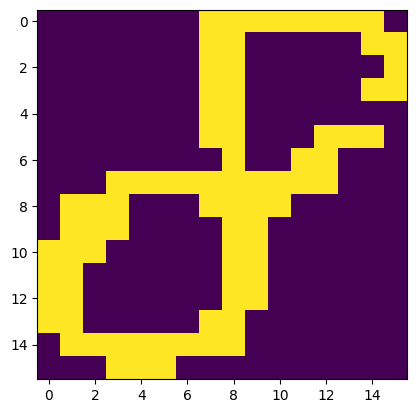

In [196]:
g = plt.imshow(x_train[0][:,:,0])

In [213]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (16,16,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 16, 16, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [221]:
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
adam = Adam(lr=0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=["accuracy"])

In [222]:
epochs = 5
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Train on 1274 samples, validate on 319 samples
Epoch 1/5
1274/1274 [==============================] - 2s 2ms/step - loss: 0.0527 - acc: 0.9859 - val_loss: 0.0114 - val_acc: 0.9969
Epoch 2/5
1274/1274 [==============================] - 2s 1ms/step - loss: 0.0490 - acc: 0.9843 - val_loss: 0.0317 - val_acc: 0.9906
Epoch 3/5
1274/1274 [==============================] - 1s 1ms/step - loss: 0.0303 - acc: 0.9914 - val_loss: 0.0162 - val_acc: 0.9937
Epoch 4/5
1274/1274 [==============================] - 2s 1ms/step - loss: 0.0187 - acc: 0.9945 - val_loss: 0.0157 - val_acc: 0.9969
Epoch 5/5
1274/1274 [==============================] - 2s 1ms/step - loss: 0.0174 - acc: 0.9945 - val_loss: 0.0299 - val_acc: 0.9906


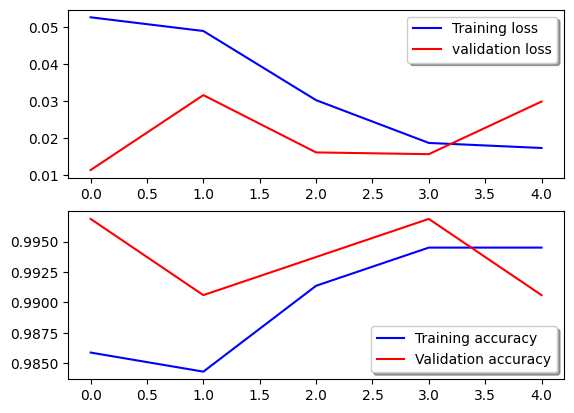

In [226]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)